In [1]:
#Import all the libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the csv data
adv_data=pd.read_csv('Advertising.csv')
df=pd.DataFrame(adv_data)
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
#View first 5 data
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Drop Unnamed column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
#View after dropping Unnamed column
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#Check all details of the data
df.describe().round(2)

,TV,radio,newspaper,sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


TV              AxesSubplot(0.125,0.125;0.168478x0.755)
radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

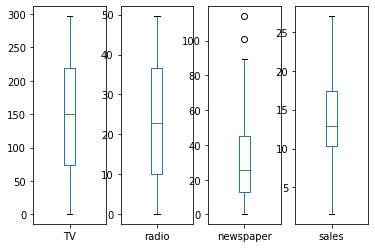

In [7]:
#Check for outliers
df.plot(kind='box',subplots=True)

In [10]:
#Get rid of outliers
q1,q3=df['newspaper'].quantile([0.25,0.75])
IQR=q3-q1
UL=q3+(1.5*IQR)
LL=q1-(1.5*IQR)
df['newspaper']=np.where(df['newspaper']>UL,UL,df['newspaper'])

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

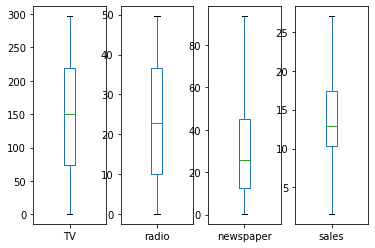

In [11]:
#Check for outliers
df.plot(kind='box',subplots=True)

In [12]:
#Split the data into x and y
x=df.drop('sales',axis=1)
#y is target
y=df['sales']

In [14]:
#Split the data into training(80%) and testing dataset(20%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=7)


In [15]:
#Check the split shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [16]:
#Fit a Linear Regression Model
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [21]:
#Coefficients of the Model
#Get the coefficients - of TV, radio, newspaper
linreg.coef_

array([ 0.04629801,  0.18880122, -0.00100282])

In [22]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [23]:
#get the intercept coefficient - Sales
linreg.intercept_

2.8484125484399723

In [24]:
#Interpreting model coefficients
#sales = 2.848 + 0.04629TV + 0.1888radio + (-0.00100newspaper)
#Meaning if we increase spending of TV by 1 unit, sales will increase by a factor of 0.1888

In [29]:
#Predictions on training and test datasets
train_pred=linreg.predict(x_train)
test_pred=linreg.predict(x_test)

In [30]:
#Import RMSE and R2 functions
from sklearn.metrics import mean_squared_error,r2_score

In [31]:
#Calculate the rmse for train and test data predictions
rmse_train=mean_squared_error(y_train,train_pred,squared=False)
rmse_test=mean_squared_error(y_test,test_pred,squared=False)
rmse_train,rmse_test

(1.6957711089912768, 1.5585107779213776)

In [36]:
rmse_train/y_train.mean() #margin of error

0.11889197556575273

In [37]:
rmse_test/y_test.mean()

0.11933466905982984

In [32]:
#R2 score
train_r2=r2_score(y_train,train_pred)
test_r2=r2_score(y_test,test_pred)
train_r2,test_r2

(0.8929135972742749, 0.9095593368967715)

In [40]:
#residual error= actual value of target variable - actual value of target variable
residuals=y_test-test_pred
residuals

86     0.443061
120    1.096137
22    -0.811746
11     0.084187
195    2.298278
2     -2.941219
121   -0.765259
94     1.046895
66     0.550896
63     0.816690
108    1.795235
96    -0.951786
138   -0.108621
65     1.502076
188   -2.810269
155   -2.022612
24     1.606678
99     0.265116
153    0.763137
46     1.765325
178   -4.269547
139    1.004417
143    1.667146
74    -0.359780
186    0.623208
169   -3.005811
101    0.469263
197    0.007407
109    0.053839
177   -0.465683
57     0.437462
106    1.147108
160    0.178666
84     0.882406
124    0.202325
85    -0.001245
126   -3.903162
183    1.989831
80     0.395790
116    0.232720
Name: sales, dtype: float64

##Liner Regression using statsmodels Library

In [41]:
#import library
from statsmodels.formula.api import ols

In [42]:
#formula string
formula='sales ~ TV + radio + newspaper'

In [45]:
#Statsmodels requires that all ind. variables and target variable be in a single dataframe
#so joining back together the indep &tgt vars of train and test datasets
train_df=pd.concat([x_train,y_train],axis=1)
test_df=pd.concat([x_test,y_test],axis=1)

In [46]:
model=ols(formula=formula,data=train_df).fit()

In [47]:
#Model Summary
model.summary()
#If p value(prob) is less than 0.05 then it is a statistically valid/signicaficant linear regression model
#p value of news paper >0.05, so it is not different than 0, so it can be treated as 0 i.e. advertising in newspaper is not effective
#p value of tv,newspaper, radio is < 0.05, so it is significantly different than 0 i.e. they are good means of advertising

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     433.6
Date:                Thu, 12 May 2022   Prob (F-statistic):           1.98e-75
Time:                        15:48:31   Log-Likelihood:                -311.53
No. Observations:                 160   AIC:                             631.1
Df Residuals:                     156   BIC:                             643.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8484      0.369      7.720      0.000       2.120       3.577
TV             0.0463      0.002     28.692      0.000       0.043       0.049
radio          0.1888      0.010     19.798      0.000       0.170       0.208
newspaper     -0.0010      0.007     -0.144      0.885      -0.015       0.013
==============================================================================
Omnibus:                       51.032   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.406
Skew:                          -1.318   Prob(JB):                     2.92e-29
Kurtosis:                       6.572   Cond. No.                         477.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
#Train the model
model.predict(test_df.drop('sales',axis=1))

86     11.556939
120    14.403863
22      6.411746
11     17.315813
195     5.301722
2      12.241219
121     7.765259
94     10.453105
66      8.949104
63     13.183310
108     3.504765
96     12.651786
138     9.708621
65      7.797924
188    18.710269
155     5.222612
24      8.093322
99     16.934884
153    18.236863
46      8.834675
178    16.069547
139    19.695583
143     8.732854
74     17.359780
186     9.676792
169    18.005811
101    23.330737
197    12.792593
109    19.746161
177    12.165683
57     12.762538
106     6.052892
160    14.221334
84     20.817594
124    19.497675
85     15.201245
126    10.503162
183    24.210169
80     11.404210
116    11.967280
dtype: float64

In [49]:
test_pred

array([11.55693888, 14.40386325,  6.41174575, 17.31581251,  5.30172198,
       12.24121885,  7.76525941, 10.45310477,  8.94910359, 13.18331025,
        3.50476471, 12.65178621,  9.70862063,  7.7979238 , 18.71026886,
        5.22261247,  8.09332211, 16.93488445, 18.23686316,  8.8346751 ,
       16.06954682, 19.69558272,  8.73285393, 17.35978017,  9.67679195,
       18.0058106 , 23.33073684, 12.79259295, 19.74616068, 12.16568344,
       12.76253762,  6.05289237, 14.22133413, 20.81759406, 19.49767513,
       15.2012445 , 10.50316179, 24.21016913, 11.40420994, 11.96728027])